In [1]:
import pylab as plt
import multiprocessing as mp
from train import train, epochs, get_data

d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

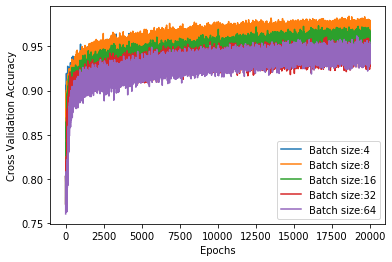

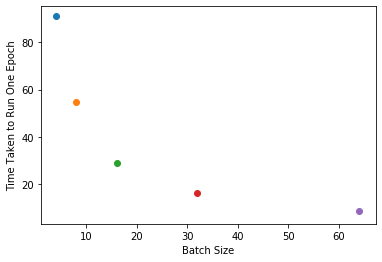






iter 100: train accuracy 0.81586
iter 100: test accuracy 0.80721
iter 200: train accuracy 0.86828
iter 200: test accuracy 0.868339
iter 300: train accuracy 0.877016
iter 300: test accuracy 0.873041
iter 400: train accuracy 0.888441
iter 400: test accuracy 0.884013
iter 500: train accuracy 0.891129
iter 500: test accuracy 0.88558
iter 600: train accuracy 0.893817
iter 600: test accuracy 0.887147
iter 700: train accuracy 0.900538
iter 700: test accuracy 0.887147
iter 800: train accuracy 0.902554
iter 800: test accuracy 0.887147
iter 900: train accuracy 0.90457
iter 900: test accuracy 0.887147
iter 1000: train accuracy 0.907258
iter 1000: test accuracy 0.887147
iter 1100: train accuracy 0.909946
iter 1100: test accuracy 0.893417
iter 1200: train accuracy 0.911962
iter 1200: test accuracy 0.893417
iter 1300: train accuracy 0.913306
iter 1300: test accuracy 0.893417
iter 1400: train accuracy 0.913979
iter 1400: test accuracy 0.898119
iter 1500: train accuracy 0.912634
iter 1500: test a

iter 10600: train accuracy 0.942204
iter 10600: test accuracy 0.893417
iter 10700: train accuracy 0.942204
iter 10700: test accuracy 0.884013
iter 10800: train accuracy 0.94086
iter 10800: test accuracy 0.890282
iter 10900: train accuracy 0.943548
iter 10900: test accuracy 0.888715
iter 11000: train accuracy 0.941532
iter 11000: test accuracy 0.89185
iter 11100: train accuracy 0.940188
iter 11100: test accuracy 0.887147
iter 11200: train accuracy 0.94086
iter 11200: test accuracy 0.890282
iter 11300: train accuracy 0.945565
iter 11300: test accuracy 0.890282
iter 11400: train accuracy 0.94086
iter 11400: test accuracy 0.89185
iter 11500: train accuracy 0.942876
iter 11500: test accuracy 0.890282
iter 11600: train accuracy 0.944892
iter 11600: test accuracy 0.890282
iter 11700: train accuracy 0.945565
iter 11700: test accuracy 0.894984
iter 11800: train accuracy 0.941532
iter 11800: test accuracy 0.890282
iter 11900: train accuracy 0.945565
iter 11900: test accuracy 0.888715
iter 12000:

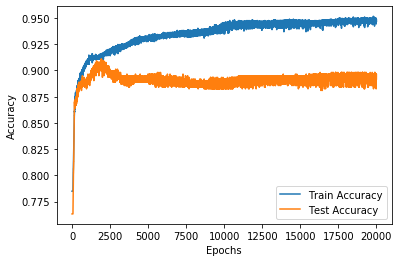

In [2]:
def main():
    params = []
    param1 = {}
    param1['weight_decay_parameter'] = 1e-6
    param1['batch_size'] = 4
    param1['hidden_layer_neuron_num'] = 10
    param1['required'] = 'cross-validation accuracy'
    param1['hidden_layer_num'] = 1
    param2 = param1.copy()
    param3 = param1.copy()
    param4 = param1.copy()
    param5 = param1.copy()
    
    params.append(param1)
    param2['batch_size'] = 8
    params.append(param2)
    param3['batch_size'] = 16
    params.append(param3)
    param4['batch_size'] = 32
    params.append(param4)
    param5['batch_size'] = 64
    params.append(param5)
    no_threads = mp.cpu_count()
    p = mp.Pool(processes=no_threads)
    accs = p.map(train, params)
    plt.figure()
    for i in range(len(params)):
        plt.plot(range(epochs), accs[i][0], label='Batch size:' 
                 + str(params[i]['batch_size']))
    plt.xlabel('Epochs')
    plt.ylabel('Cross Validation Accuracy')
    plt.legend()
    plt.savefig('Q2ab.png', bbox_inches='tight', dpi=100)
    plt.show()
    
    #plot time taken to run one epoch
    plt.figure()
    for i in range(len(params)):
        plt.scatter(params[i]['batch_size'], accs[i][1])
    plt.xlabel('Batch Size')
    plt.ylabel('Time Taken to Run One Epoch')
    plt.savefig('Q2ab_Time.png', bbox_inches='tight', dpi=100)
    plt.show()

    # plot for (c)
    param5['required'] = 'train accuracy and test accuracy'
    acc = train(param5)
    plt.figure()
    plt.plot(range(epochs), acc[0], label='Train Accuracy')
    plt.plot(range(epochs), acc[1], label='Test Accuracy')  
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('Q2c.png', bbox_inches='tight', dpi=100)
    plt.show()
    
if __name__ == '__main__':
    main()